In [307]:
import numpy as np
import matplotlib.pyplot as plt
import wget
from astropy.io import fits
from astropy.visualization import make_lupton_rgb
from photutils.segmentation import detect_sources,detect_threshold,deblend_sources,SourceCatalog
from photutils.isophote import EllipseGeometry,Ellipse
from photutils.aperture import EllipticalAperture
import astropy.units as u
from photutils.isophote import Ellipse
from matplotlib.image import imread

In [321]:
url='https://www.legacysurvey.org/viewer/cutout.fits?ra=213.0905&dec=8.6526&layer=ls-dr9&pixscale=1.00&bands=grz&size=1024'
RA=213.0905
Dec=8.6525
Im=imread('Imagen original.png')

In [4]:
Fits = fits.open("cutout_213.0905_8.6525.fits")
Fits.info()

Filename: cutout_213.0905_8.6525.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      28   (1024, 1024, 3)   float32   


In [5]:
Data=np.array(Fits[0].data)
Filtro_g=Data[0,:,:]
Filtro_r=Data[1,:,:]
Filtro_z=Data[2,:,:]

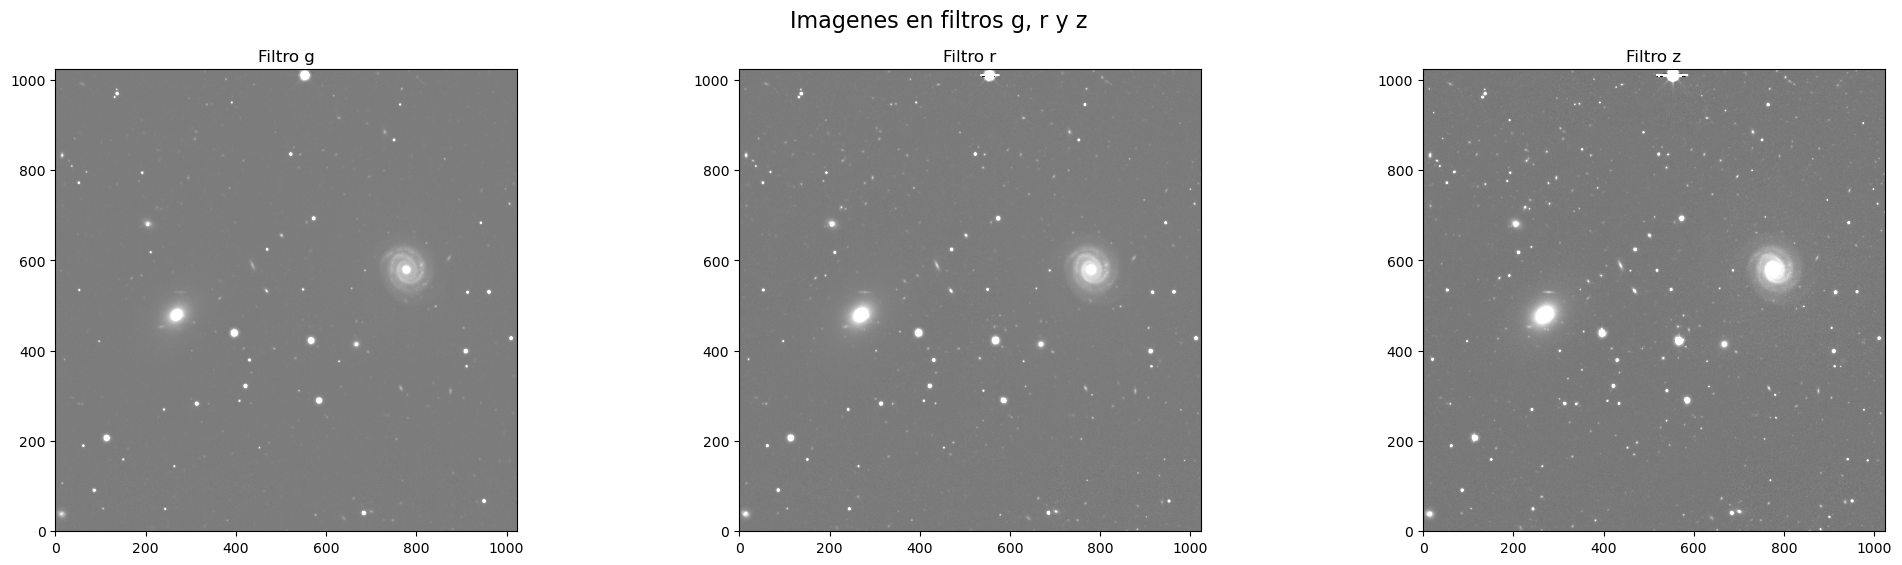

In [273]:
fig,ax=plt.subplots(1,3,figsize=(25,6))
fig.suptitle('Imagenes en filtros g, r y z',x=0.5,fontsize=16)
ax[0].imshow(Filtro_g,cmap='gray',vmin=Filtro_g.mean()-Filtro_g.std(),vmax=Filtro_g.mean()+Filtro_g.std(),origin='lower')
ax[1].imshow(Filtro_r,cmap='gray',vmin=Filtro_r.mean()-Filtro_r.std(),vmax=Filtro_r.mean()+Filtro_r.std(),origin='lower')
ax[2].imshow(Filtro_z,cmap='gray',vmin=Filtro_z.mean()-Filtro_z.std(),vmax=Filtro_z.mean()+Filtro_z.std(),origin='lower')
ax[0].set_title('Filtro g')
ax[1].set_title('Filtro r')
ax[2].set_title('Filtro z')
plt.savefig('Imagenes en zscale')
plt.show()

## Parte 1 : Catálogo ##

In [7]:
threshold_g=detect_threshold(Filtro_g,3)
Fuentes_g= detect_sources(Filtro_g,threshold_g,npixels=10)
Catalogo_g=deblend_sources(Filtro_g,Fuentes_g,npixels=10,contrast=0.39,progress_bar=False)
threshold_r=detect_threshold(Filtro_r,3)
Fuentes_r= detect_sources(Filtro_r,threshold_r,npixels=10)
Catalogo_r=deblend_sources(Filtro_r,Fuentes_r,npixels=10,contrast=0.1,progress_bar=False)
threshold_z=detect_threshold(Filtro_z,3)
Fuentes_z= detect_sources(Filtro_z,threshold_z,npixels=10)
Catalogo_z=deblend_sources(Filtro_z,Fuentes_z,npixels=10,contrast=0.2,progress_bar=False)

In [8]:
Catg=SourceCatalog(Filtro_g,Catalogo_g)
Catr=SourceCatalog(Filtro_r,Catalogo_r)
Catz=SourceCatalog(Filtro_z,Catalogo_z)

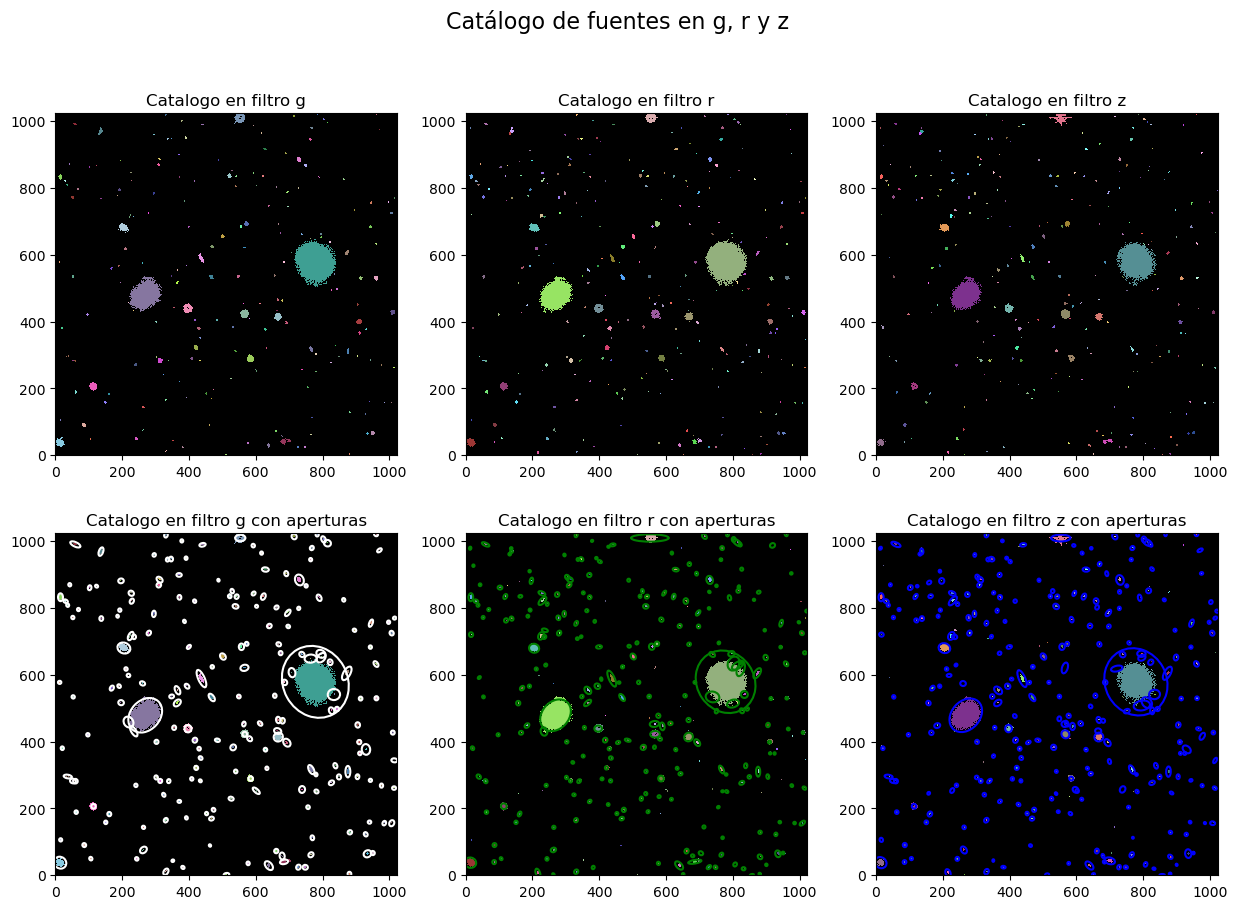

In [300]:
fig,ax=plt.subplots(2,3,figsize=(15,10))
fig.suptitle('Catálogo de fuentes en g, r y z',x=0.5,fontsize=16)
ax[0,0].imshow(Catalogo_g,cmap=Catalogo_g.cmap,origin='lower',interpolation='nearest')
ax[0,1].imshow(Catalogo_r,cmap=Catalogo_r.cmap,origin='lower',interpolation='nearest')
ax[0,2].imshow(Catalogo_z,cmap=Catalogo_z.cmap,origin='lower',interpolation='nearest')
ax[1,0].imshow(Catalogo_g,cmap=Catalogo_g.cmap,origin='lower',interpolation='nearest')
ax[1,1].imshow(Catalogo_r,cmap=Catalogo_r.cmap,origin='lower',interpolation='nearest')
ax[1,2].imshow(Catalogo_z,cmap=Catalogo_z.cmap,origin='lower',interpolation='nearest')
ax[0,0].set_title('Catalogo en filtro g')
ax[0,1].set_title('Catalogo en filtro r')
ax[0,2].set_title('Catalogo en filtro z')
ax[1,0].set_title('Catalogo en filtro g con aperturas')
ax[1,1].set_title('Catalogo en filtro r con aperturas')
ax[1,2].set_title('Catalogo en filtro z con aperturas')
Catg.plot_kron_apertures(ax=ax[1,0],color='white', lw=1.5)
Catz.plot_kron_apertures(ax=ax[1,1],color='green', lw=1.5)
Catr.plot_kron_apertures(ax=ax[1,2],color='blue', lw=1.5)
plt.savefig('Catalogo de fuentes')
plt.show()

In [79]:
Estrellas=make_lupton_rgb(Filtro_z,Filtro_r,Filtro_g,Q=1,stretch=0.5,filename='Catalogo.jpeg')

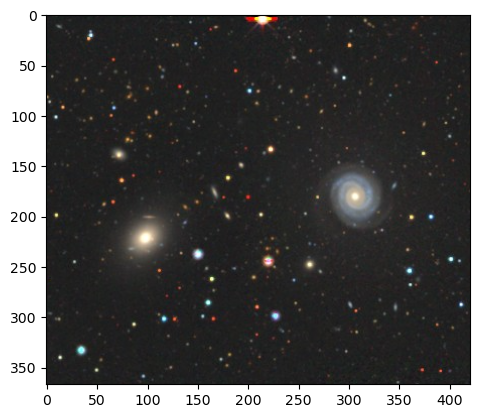

In [ ]:
plt.imshow(Im)

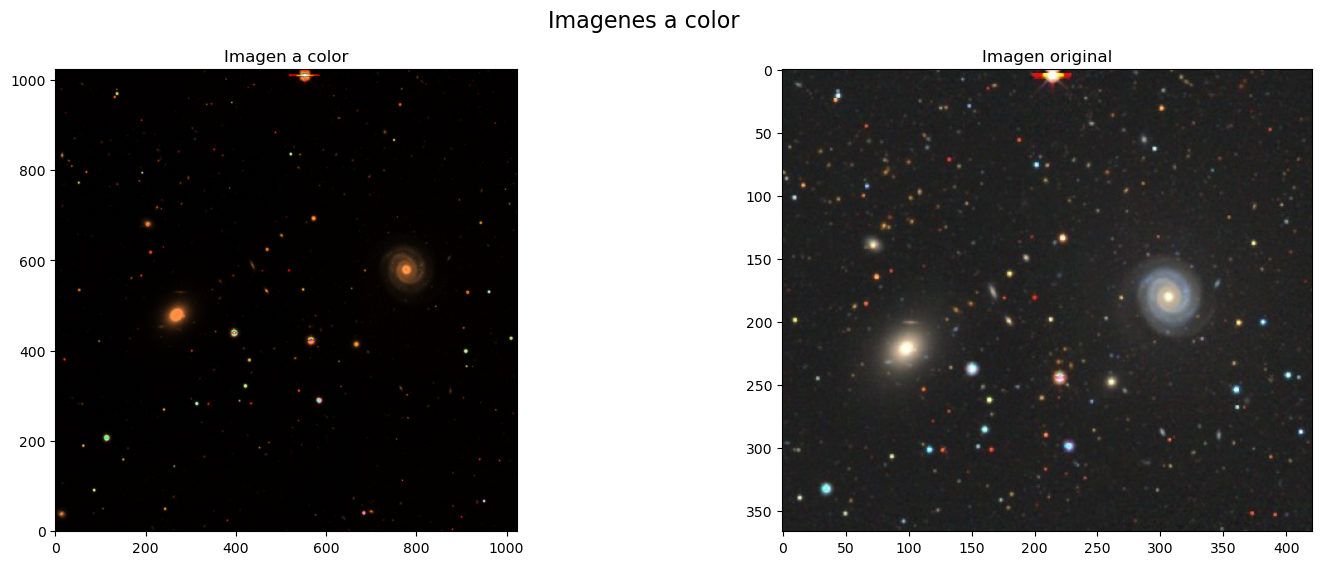

In [317]:
fig,ax=plt.subplots(1,2,figsize=(18,6))
fig.suptitle('Imagenes a color',x=0.5,fontsize=16)
ax[0].imshow(Estrellas,origin='lower')
ax[1].imshow(Im)
ax[0].set_title('Imagen a color')
ax[1].set_title('Imagen original')
plt.savefig('Comparacion color')
plt.show()

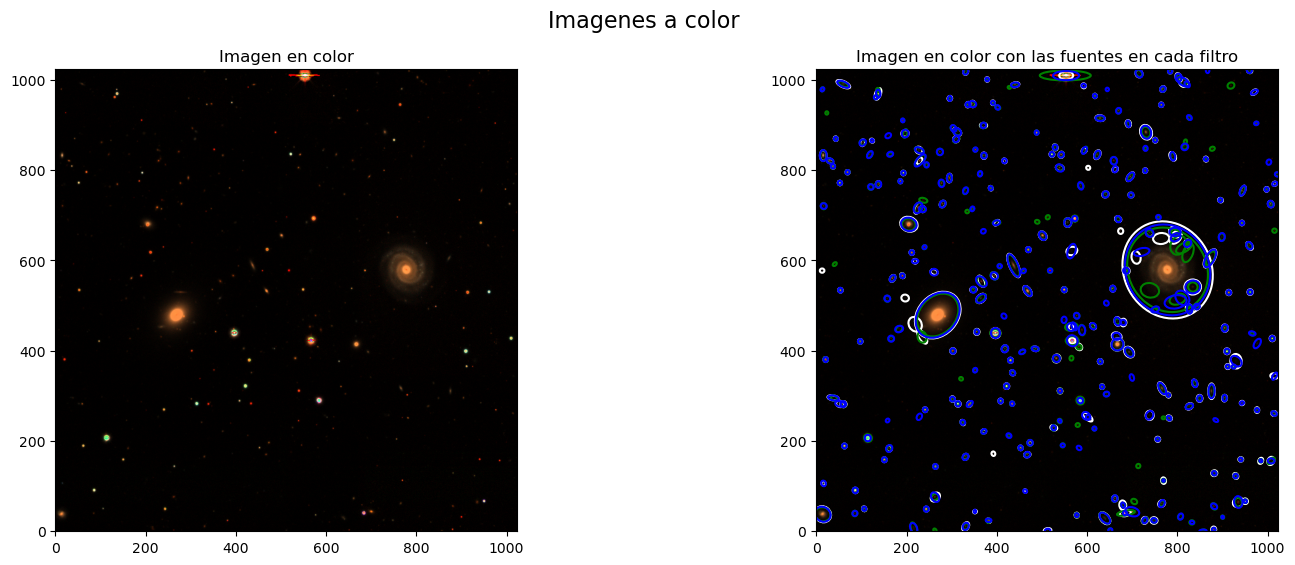

In [298]:
fig,ax=plt.subplots(1,2,figsize=(18,6))
fig.suptitle('Imagenes a color',x=0.5,fontsize=16)
ax[0].imshow(Estrellas,origin='lower')
ax[1].imshow(Estrellas,origin='lower')
ax[0].set_title('Imagen en color')
ax[1].set_title('Imagen en color con las fuentes en cada filtro')
Catg.plot_kron_apertures(ax=ax[1],color='white', lw=1.5,label='Filtro g')
Catz.plot_kron_apertures(ax=ax[1],color='green', lw=1.5)
Catr.plot_kron_apertures(ax=ax[1],color='blue', lw=1.5)
plt.savefig('Imagenes a color')
plt.show()

In [12]:
tbl_g= Catg.to_table()
tbl_r= Catr.to_table()
tbl_z= Catz.to_table()

In [263]:
Magnitud_fuentes_g=(-1)*2.5*np.log10(tbl_g['segment_flux'])
Magnitud_fuentes_r=(-1)*2.5*np.log10(tbl_r['segment_flux'])
Magnitud_fuentes_z=(-1)*2.5*np.log10(tbl_z['segment_flux'])
Tamaños_fuentes_g=tbl_g['semimajor_sigma'].value
Tamaños_fuentes_r=tbl_r['semimajor_sigma'].value
Tamaños_fuentes_z=tbl_z['semimajor_sigma'].value

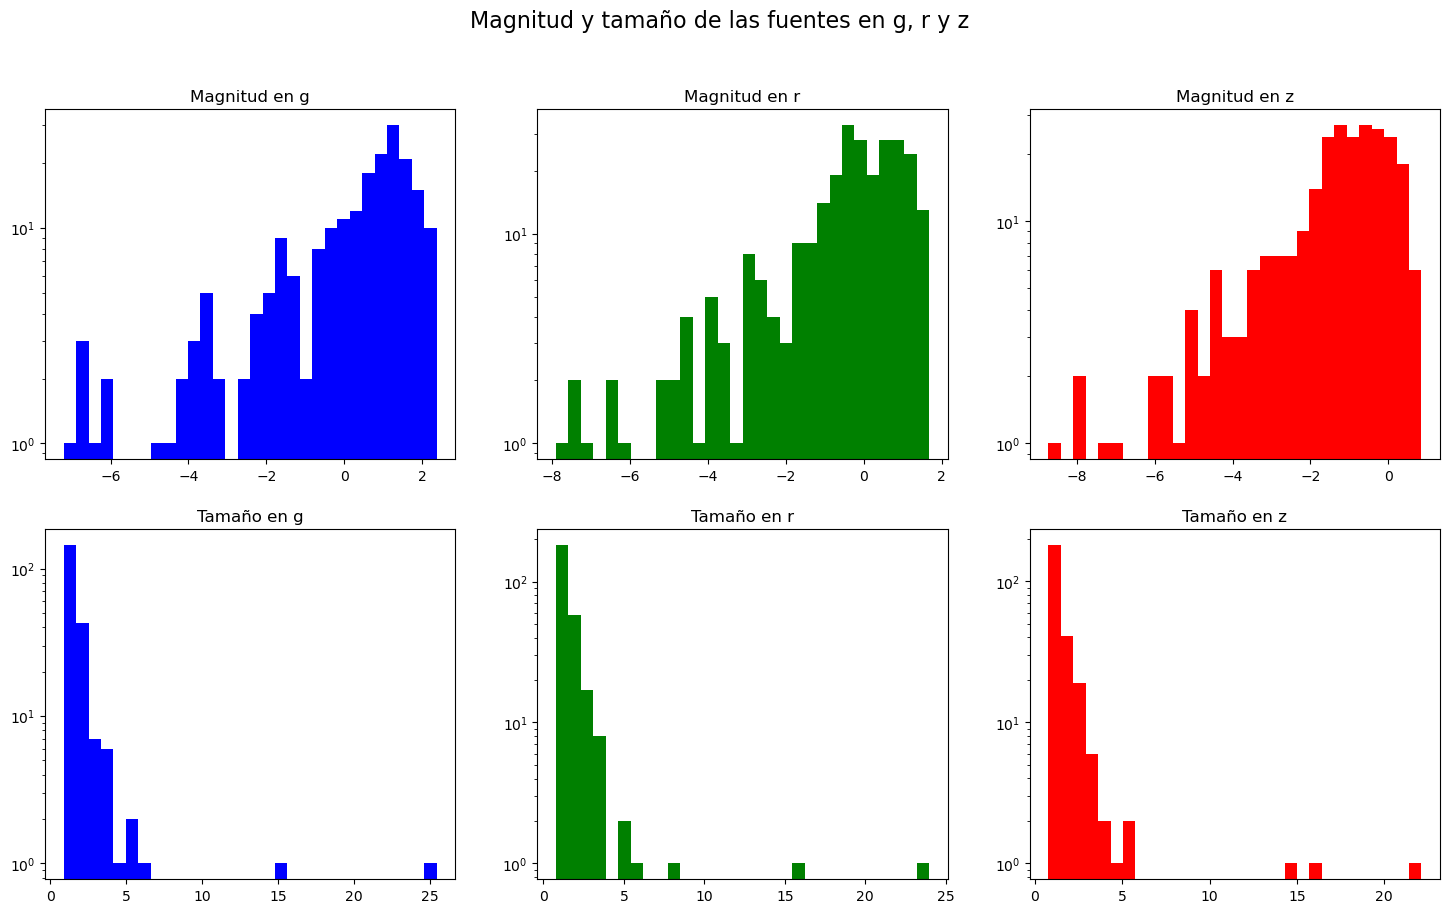

In [319]:
fig,ax=plt.subplots(2,3,figsize=(18,10))
fig.suptitle('Magnitud y tamaño de las fuentes en g, r y z',x=0.5,fontsize=16)
ax[0,0].hist(Magnitud_fuentes_g,bins=30,color='blue',log=True)
ax[0,1].hist(Magnitud_fuentes_r,bins=30,color='green',log=True)
ax[0,2].hist(Magnitud_fuentes_z,bins=30,color='red',log=True)
ax[0,0].set_title('Magnitud en g')
ax[0,1].set_title('Magnitud en r')
ax[0,2].set_title('Magnitud en z')
ax[1,0].hist(Tamaños_fuentes_g,bins=30,color='blue',log=True)
ax[1,1].hist(Tamaños_fuentes_r,bins=30,color='green',log=True)
ax[1,2].hist(Tamaños_fuentes_z,bins=30,color='red',log=True)
ax[1,0].set_title('Tamaño en g')
ax[1,1].set_title('Tamaño en r')
ax[1,2].set_title('Tamaño en z')
plt.savefig('Magnitud y tamaño con el catalogo')
plt.show()

In [279]:
Imagen_reducida=Data.mean(axis=0) # en lugar de usar cada filtro, usamos el promedio
Threshold_general=detect_threshold(Imagen_reducida,3)
Fuentes_general=detect_sources(Imagen_reducida,Threshold_general,npixels=10)
Catalogo_general=deblend_sources(Imagen_reducida,Fuentes_general,npixels=10,contrast=0.39,progress_bar=False)
Catgeneralg=SourceCatalog(Filtro_g,Catalogo_general)
Catgeneralr=SourceCatalog(Filtro_r,Catalogo_general)
Catgeneralz=SourceCatalog(Filtro_z,Catalogo_general)
Tbl_generalg=Catgeneralg.to_table()
Tbl_generalz=Catgeneralr.to_table()
Tbl_generalr=Catgeneralz.to_table()

In [280]:
Magnitud_fuentes_geng=(-1)*2.5*np.log10(Tbl_generalg['segment_flux'])
Magnitud_fuentes_genr=(-1)*2.5*np.log10(Tbl_generalr['segment_flux'])
Magnitud_fuentes_genz=(-1)*2.5*np.log10(Tbl_generalz['segment_flux'])
Tamaños_fuentes_geng=Tbl_generalg['semimajor_sigma'].value
Tamaños_fuentes_genr=Tbl_generalr['semimajor_sigma'].value
Tamaños_fuentes_genz=Tbl_generalz['semimajor_sigma'].value

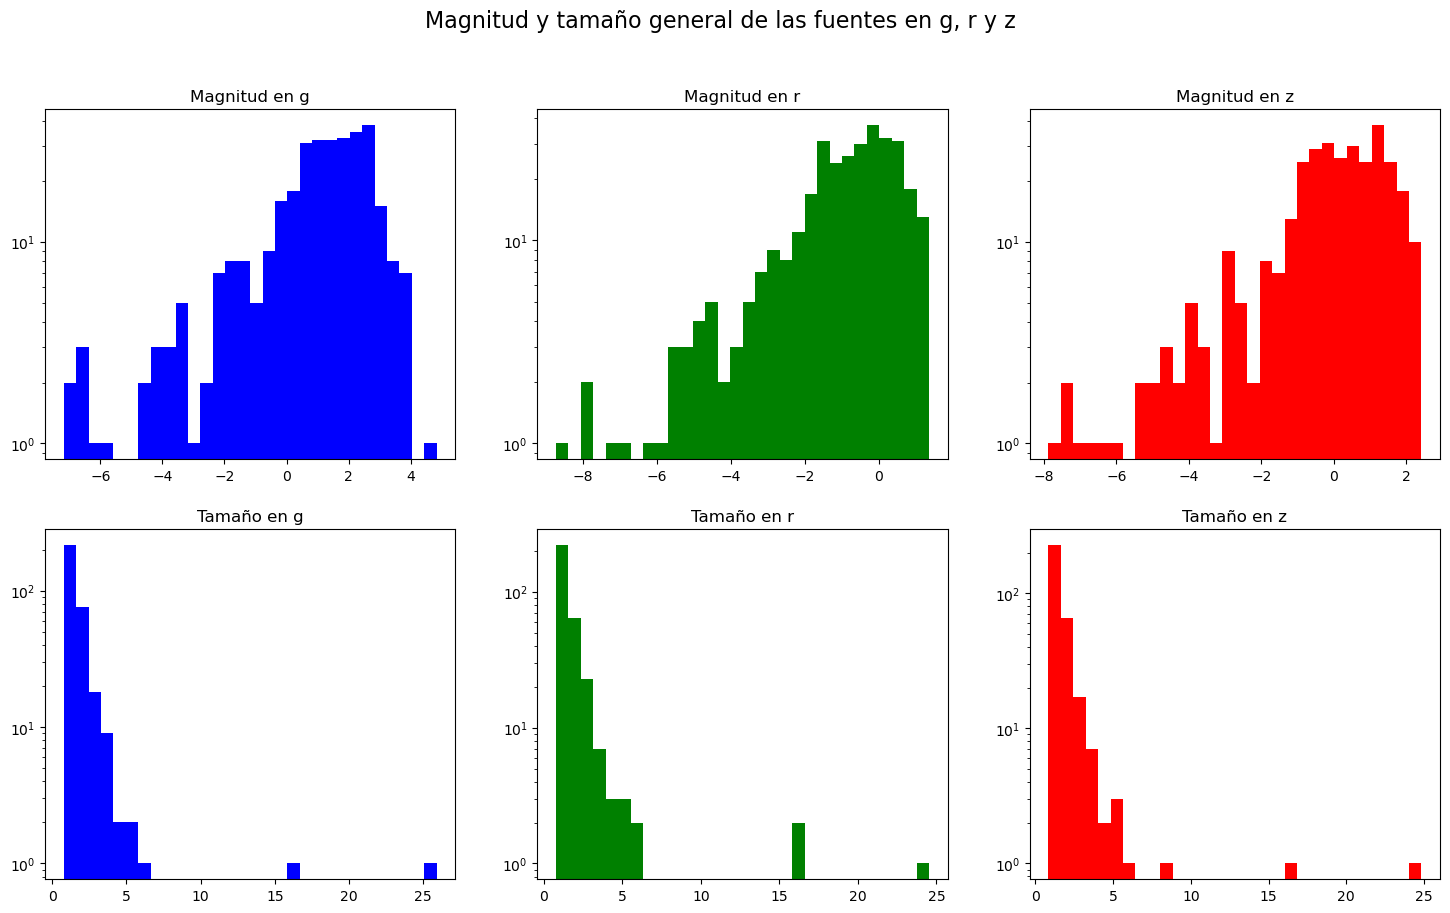

In [318]:
fig,ax=plt.subplots(2,3,figsize=(18,10))
fig.suptitle('Magnitud y tamaño general de las fuentes en g, r y z',x=0.5,fontsize=16)
ax[0,0].hist(Magnitud_fuentes_geng,bins=30,color='blue',log=True)
ax[0,1].hist(Magnitud_fuentes_genr,bins=30,color='green',log=True)
ax[0,2].hist(Magnitud_fuentes_genz,bins=30,color='red',log=True)
ax[0,0].set_title('Magnitud en g')
ax[0,1].set_title('Magnitud en r')
ax[0,2].set_title('Magnitud en z')
ax[1,0].hist(Tamaños_fuentes_geng,bins=30,color='blue',log=True)
ax[1,1].hist(Tamaños_fuentes_genr,bins=30,color='green',log=True)
ax[1,2].hist(Tamaños_fuentes_genz,bins=30,color='red',log=True)
ax[1,0].set_title('Tamaño en g')
ax[1,1].set_title('Tamaño en r')
ax[1,2].set_title('Tamaño en z')
plt.savefig('Magnitud y tamaño con el catalogo general')
plt.show()

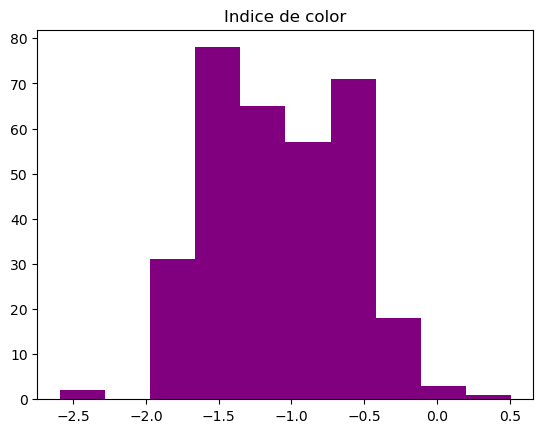

In [320]:
Indice_de_color=Magnitud_fuentes_genz-Magnitud_fuentes_geng
plt.hist(Indice_de_color,color='purple')
plt.title('Indice de color')
plt.savefig('Indice de color')
plt.show()

## Parte 2: Isofotas ##

In [191]:
Columna= 'area'  
Min_pixg = 400 
Min_pixr = 300 
Min_pixz = 300 
Objetos_grandes_g= tbl_g[(tbl_g[Columna]*u.pix**-2)> Min_pixg]
Objetos_grandes_r= tbl_r[(tbl_r[Columna]*u.pix**-2)> Min_pixr]
Objetos_grandes_z= tbl_z[(tbl_z[Columna]*u.pix**-2)> Min_pixz]

In [144]:
Objetos_grandes_g

<QTable length=9>
label     xcentroid          ycentroid      ...     kron_flux      kron_fluxerr
                                            ...                                
int32      float64            float64       ...      float64         float64   
----- ------------------ ------------------ ... ------------------ ------------
    8 14.339278026510534 37.250713812961585 ... 21.088703989037352          nan
   37 114.10833782403616  206.0079315393346 ...  357.8059407723185          nan
   51  584.9416296594026  289.0685779689045 ...  295.6247855376166          nan
   84  567.2467470325346  422.0021652760315 ... 434.29628806101516          nan
   87   397.080716307714  438.5102046660368 ... 235.07024668995552          nan
   89 269.03008737478416  478.6321994022375 ...  441.7271276857223          nan
  100  778.5459820142343   578.812027786064 ...   591.473632547884          nan
  133 205.17500659578693  680.0984197400628 ...  28.10021708328579          nan
  199  553.6909113933526 1009.6687809443642 ...  730.6326274496139          nan

In [145]:
Objetos_grandes_r

<QTable length=10>
label     xcentroid          ycentroid      ...     kron_flux      kron_fluxerr
                                            ...                                
int32      float64            float64       ...      float64         float64   
----- ------------------ ------------------ ... ------------------ ------------
   11 14.115349781606575  37.35504026679095 ... 40.706131095695156          nan
   45 114.03651329052225 206.10997976969497 ...  604.9399071566861          nan
   66  584.8847631667036   289.173319595908 ... 406.89748155746236          nan
   96  667.4770012996152 413.56130615943266 ...  59.40377400329609          nan
   99  567.3015765749683 421.83061462987865 ... 274.73244812968085          nan
  104  268.9425986393078  478.6647938837108 ...  920.6996890716862          nan
  105  397.0274273772667 438.89944625392565 ... 345.52694933398055          nan
  124  778.4303995930484  578.8287266639693 ... 1060.8264356504205          nan
  162 204.92749106814446  679.8550699557933 ... 63.036818854473125          nan
  252  553.5108775363175 1009.5199535112064 ... 1394.0507825336297          nan

In [146]:
Objetos_grandes_z

<QTable length=10>
label     xcentroid          ycentroid      ...     kron_flux      kron_fluxerr
                                            ...                                
int32      float64            float64       ...      float64         float64   
----- ------------------ ------------------ ... ------------------ ------------
   12 14.155045375161194  37.23360658483784 ...  65.21234964274434          nan
   45 114.33801154839452 206.24184944776957 ...  276.9396827614804          nan
   62  585.0286128296179  289.1892831873726 ...  224.5310188630304          nan
   92  667.5295720394453  413.5408320716349 ... 102.24911341314147          nan
   96  567.1206659228559  421.9421475149498 ...  777.4550935886264          nan
  100  396.8159960615971  438.7621176703234 ...  522.0997213537473          nan
  102  269.0564795159151  478.7850513524186 ... 1596.6321507526513          nan
  115   778.409172113151  579.0262919256753 ... 1650.5107038055692          nan
  152 204.89938388936721  679.4275217264801 ... 117.25121741008417          nan
  241  551.7231117715838 1009.7425375481009 ... 2989.6054356107497          nan

b)Para poder las isofotas usamos una función dada para generar una lista de ella, luego graficarlas dentro de la imagen y ajustar según se estime conveniente. Estas nos sirven para poder estudiar la distribución de luminosidad de nuestras fuentes.

In [239]:
def Objeto_g(index,Min,Max,Step): #index:indice del objeto,Min:isofota más pequeña,Max:isofota más grande,step:cuantas isofotas salta
    obj=Objetos_grandes_g[index] #tomamos el objeto en el filtro
    x1=obj['bbox_xmin'] #obtenemos sus coordenadas
    x2=obj['bbox_xmax']
    y1=obj['bbox_ymin']
    y2=obj['bbox_ymax']
    xcen=obj['xcentroid'] # sus centroides para la funcion ellipse geomtry
    ycen=obj['ycentroid']
    sma=obj['semimajor_sigma'].value #su semieje mayor
    eps=obj['eccentricity'].value   #su excentricidad
    pa=obj['orientation'].value*(np.pi/180) #y su orientacion
    fig,ax=plt.subplots(1,3,figsize=(18,6)) #graficamos el objeto sin isofota
    fig.suptitle('Objeto e isofotas del objeto en el filtro g',x=0.5,fontsize=16)
    ax[0].imshow(Filtro_g,vmin=0,vmax=Filtro_g.mean()+Filtro_g.std(),origin='lower')
    ax[1].imshow(Filtro_g,vmin=0,vmax=Filtro_g.mean()+Filtro_g.std(),origin='lower')
    ax[2].imshow(Estrellas,origin='lower') #el objeto en rgb
    Geo=EllipseGeometry(int(xcen),int(ycen),int(sma),eps,pa) #creamos la elipse de prueba
    Eli=Ellipse(Filtro_g,Geo)  #creamos la elipse en la data
    Isolist=Eli.fit_image()    # realizamos una lista de isofotas con la informacion inicial
    for i in range(Min,Max,Step):
        Aper=EllipticalAperture((Isolist.x0[i], Isolist.y0[i]), Isolist.sma[i],Isolist.sma[i] * (1 -Isolist.eps[i]),Isolist.pa[i])
        Aper.plot(ax=ax[1],color='red') #ponemos todas sus aperturas y las graficamos
    ax[0].set_xlim(x1,x2)
    ax[0].set_ylim(y1,y2)        #hacemos un acercamiento
    ax[1].set_xlim(x1,x2)
    ax[1].set_ylim(y1,y2)
    ax[2].set_xlim(x1-20,x2+20)
    ax[2].set_ylim(y1-20,y2+20)
    ax[0].set_title('Objeto')
    ax[1].set_title('Isofotas')
    ax[2].set_title('Objeto en color')
def Objeto_r(index,Min,Max,Step):
    obj=Objetos_grandes_r[index]
    x1=obj['bbox_xmin']
    x2=obj['bbox_xmax']
    y1=obj['bbox_ymin']
    y2=obj['bbox_ymax']
    xcen=obj['xcentroid']
    ycen=obj['ycentroid']
    sma=obj['semimajor_sigma'].value
    eps=obj['eccentricity'].value
    pa=obj['orientation'].value*(np.pi/180)
    fig,ax=plt.subplots(1,3,figsize=(18,6))
    fig.suptitle('Objeto e isofotas del objeto en el filtro r',x=0.5,fontsize=16)
    ax[0].imshow(Filtro_r,vmin=0,vmax=Filtro_r.mean()+Filtro_r.std(),origin='lower')
    ax[1].imshow(Filtro_r,vmin=0,vmax=Filtro_r.mean()+Filtro_r.std(),origin='lower')
    ax[2].imshow(Estrellas,origin='lower')
    Geo=EllipseGeometry(int(xcen),int(ycen),int(sma),eps,pa)
    Eli=Ellipse(Filtro_r,Geo)
    Isolist=Eli.fit_image()
    for i in range(Min,Max,Step):
        Aper=EllipticalAperture((Isolist.x0[i], Isolist.y0[i]), Isolist.sma[i],Isolist.sma[i] * (1 -Isolist.eps[i]),Isolist.pa[i])
        Aper.plot(ax=ax[1],color='red')
    ax[0].set_xlim(x1,x2)
    ax[0].set_ylim(y1,y2)
    ax[1].set_xlim(x1,x2)
    ax[1].set_ylim(y1,y2)
    ax[2].set_xlim(x1-20,x2+20)
    ax[2].set_ylim(y1-20,y2+20)
    ax[0].set_title('Objeto')
    ax[1].set_title('Isofotas')
    ax[2].set_title('Objeto en color')
def Objeto_z(index,Min,Max,Step):
    obj=Objetos_grandes_z[index]
    x1=obj['bbox_xmin']
    x2=obj['bbox_xmax']
    y1=obj['bbox_ymin']
    y2=obj['bbox_ymax']
    xcen=obj['xcentroid']
    ycen=obj['ycentroid']
    sma=obj['semimajor_sigma'].value
    eps=obj['eccentricity'].value
    pa=obj['orientation'].value*(np.pi/180)
    fig,ax=plt.subplots(1,3,figsize=(18,6))
    fig.suptitle('Objeto e isofotas del objeto en el filtro z',x=0.5,fontsize=16)
    ax[0].imshow(Filtro_z,vmin=0,vmax=Filtro_z.mean()+Filtro_z.std(),origin='lower')
    ax[1].imshow(Filtro_z,vmin=0,vmax=Filtro_z.mean()+Filtro_z.std(),origin='lower')
    ax[2].imshow(Estrellas,origin='lower')
    Geo=EllipseGeometry(int(xcen),int(ycen),int(sma),eps,pa)
    Eli=Ellipse(Filtro_z,Geo)
    Isolist=Eli.fit_image()
    for i in range(Min,Max,Step):
        Aper=EllipticalAperture((Isolist.x0[i], Isolist.y0[i]), Isolist.sma[i],Isolist.sma[i] * (1 -Isolist.eps[i]),Isolist.pa[i])
        Aper.plot(ax=ax[1],color='red')
    ax[0].set_xlim(x1,x2)
    ax[0].set_ylim(y1,y2)
    ax[1].set_xlim(x1,x2)
    ax[1].set_ylim(y1,y2)
    ax[2].set_xlim(x1-20,x2+20)
    ax[2].set_ylim(y1-20,y2+20)
    ax[0].set_title('Objeto')
    ax[1].set_title('Isofotas')
    ax[2].set_title('Objeto en color')

c)Podemos notar como los objetos más regulares, que son más parecidos a fuentes puntuales, tienen isofotas más definidas; mientras que las isofotas de los objetos irregulares, como por ejemplo las galaxias espirales, no se ajustan de buena manera a la distribución de luminosidad de la fuente

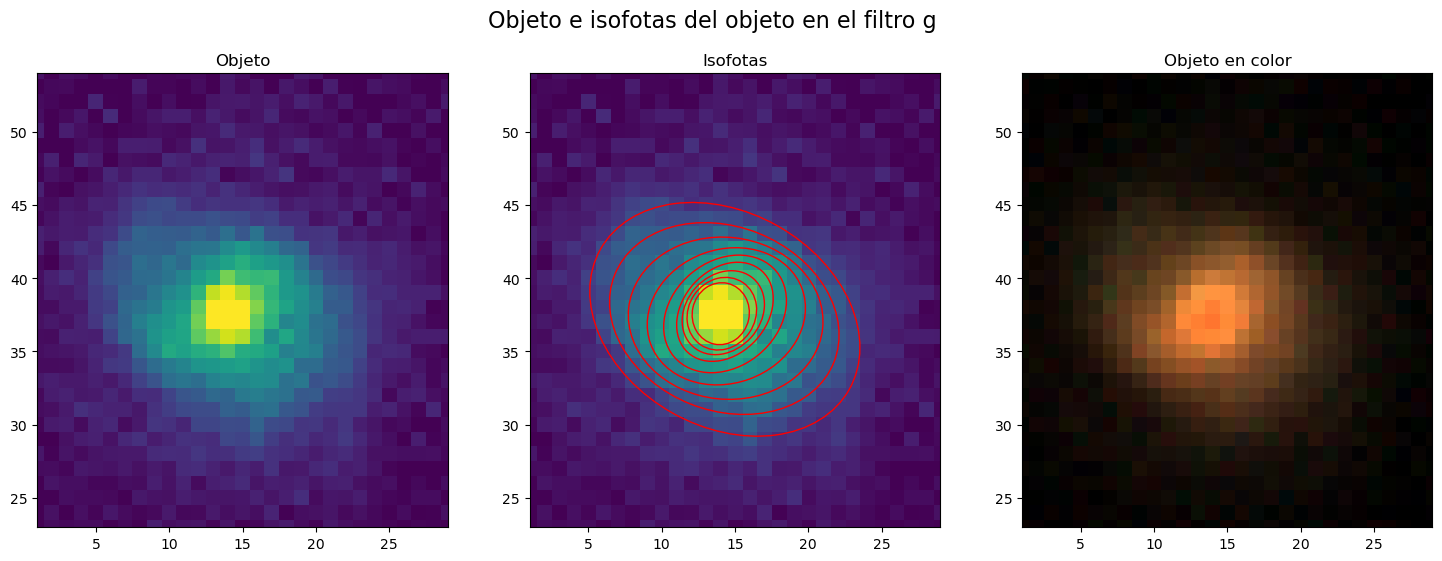

In [238]:
Objeto1=Objeto_g(0,16,34,2)
plt.savefig('Objeto 1')

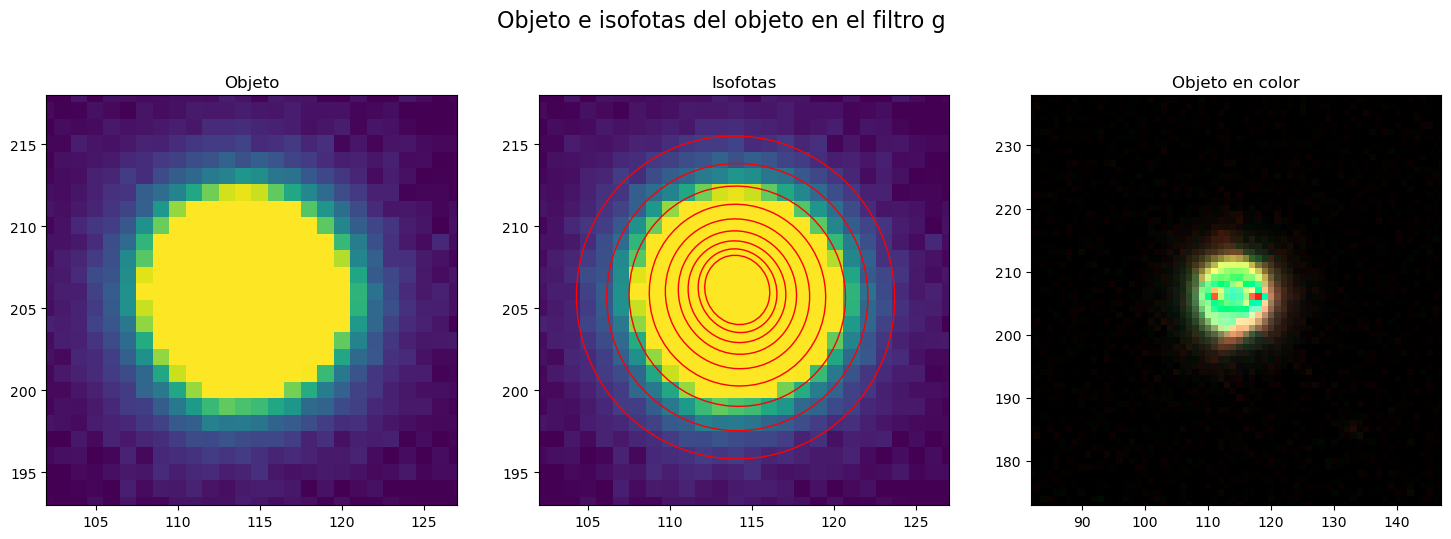

In [241]:
Objeto2=Objeto_g(1,16,34,2)
plt.savefig('Objeto 2')

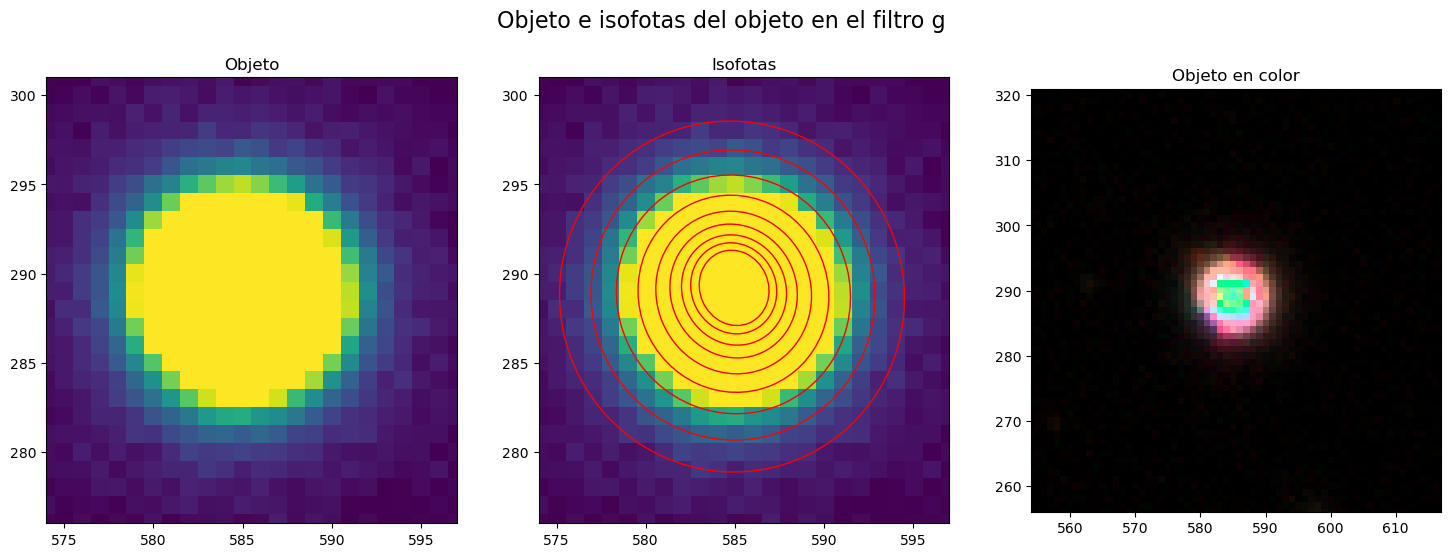

In [242]:
Objeto3=Objeto_g(2,16,34,2)
plt.savefig('Objeto 3')

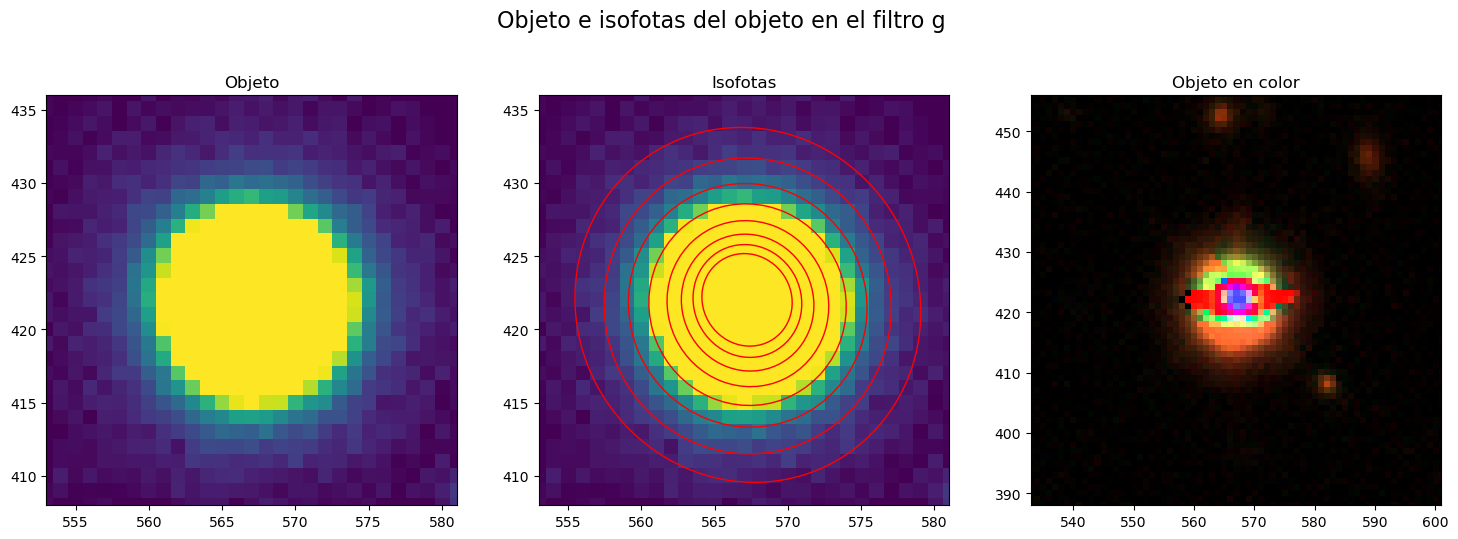

In [244]:
Objeto4=Objeto_g(3,20,36,2)
plt.savefig('Objeto 4')

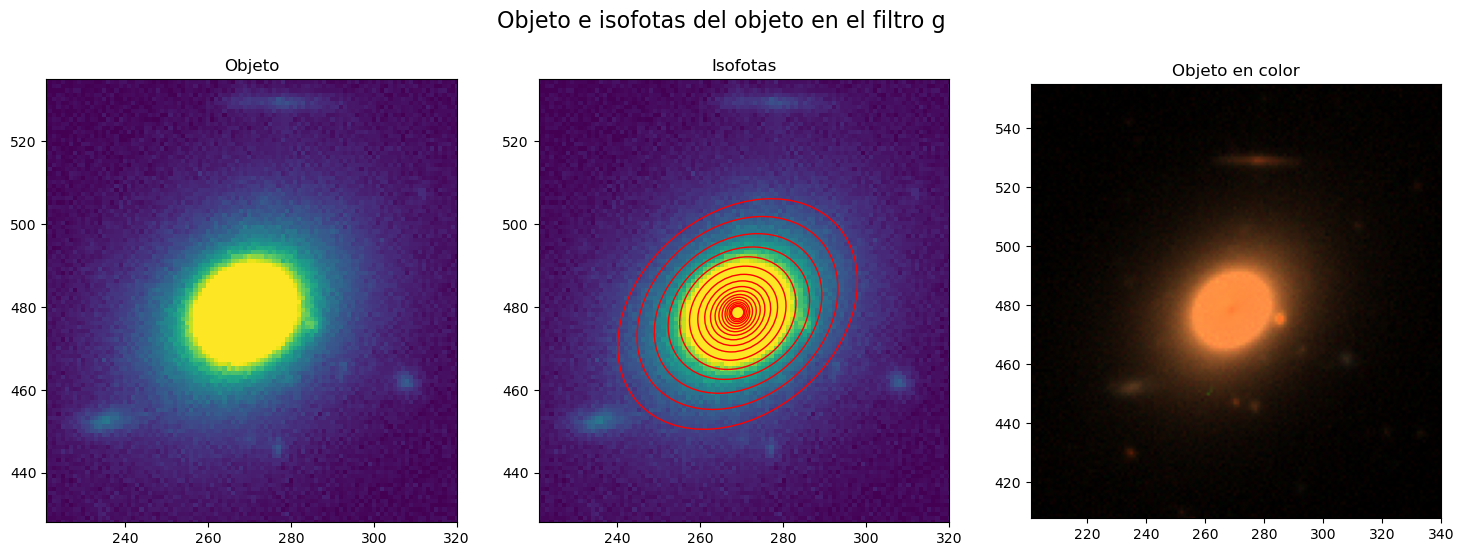

In [245]:
Objeto5=Objeto_g(5,12,46,2)
plt.savefig('Objeto 5')

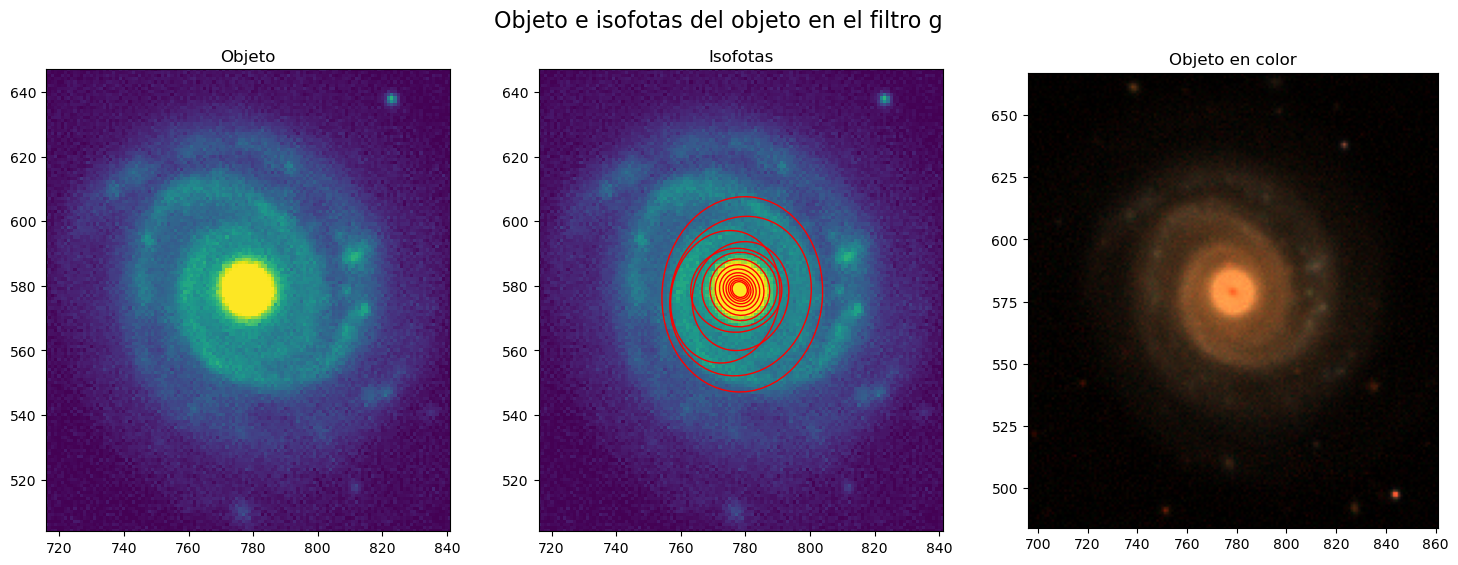

In [246]:
Objeto6=Objeto_g(6,18,46,2)
plt.savefig('Objeto 6')

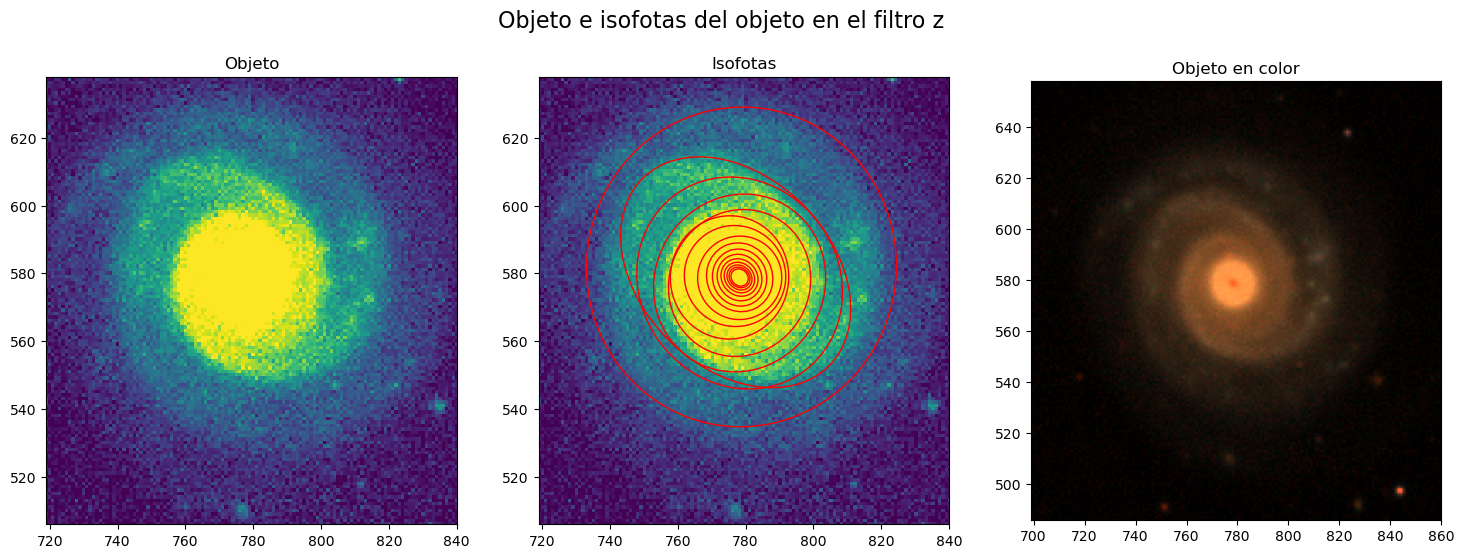

In [247]:
Objeto7=Objeto_z(7,18,50,2)
plt.savefig('Objeto 7')

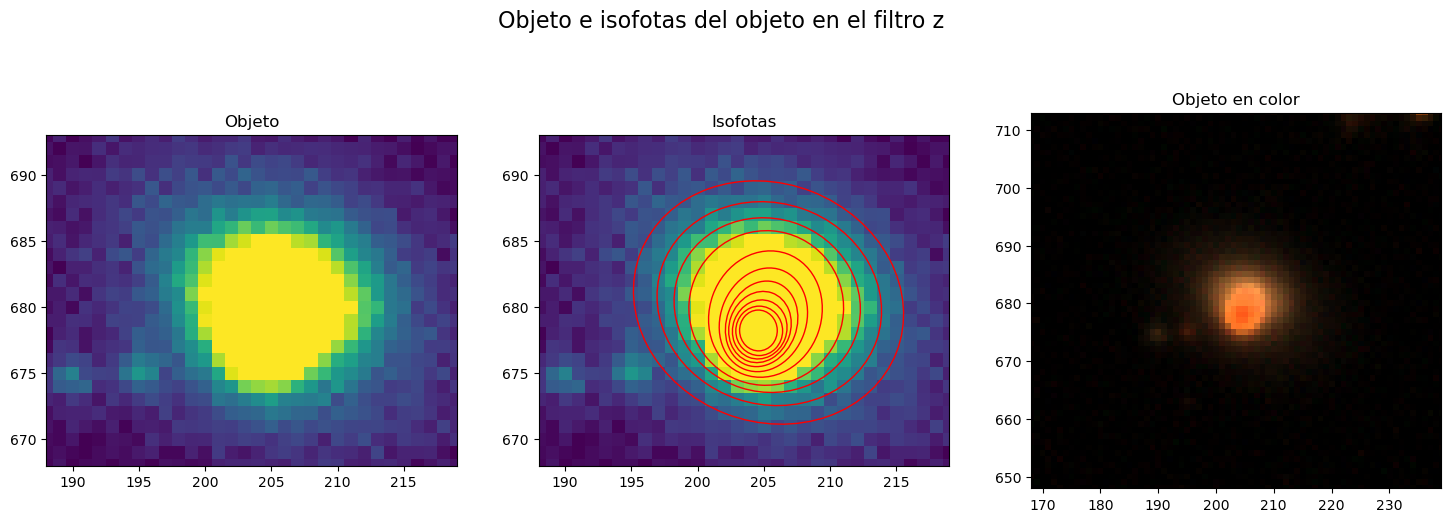

In [248]:
Objeto8=Objeto_z(8,12,34,2)
plt.savefig('Objeto 8')

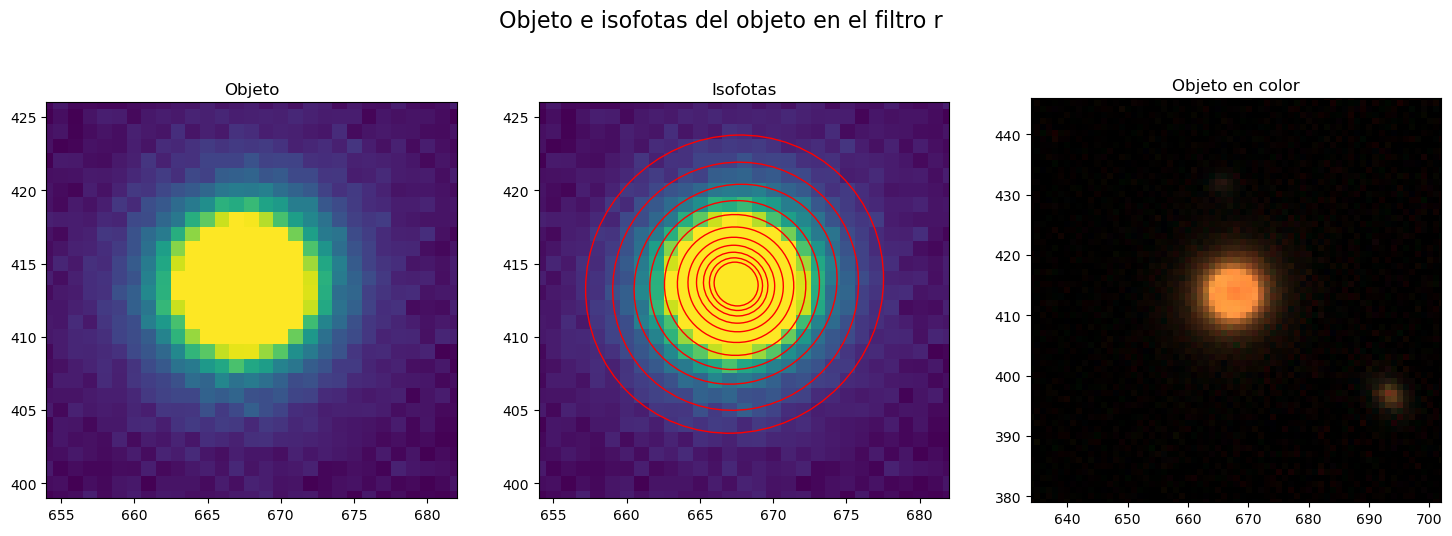

In [249]:
Objeto9=Objeto_r(3,12,34,2)
plt.savefig('Objeto 9')